In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

/tmp/ipykernel_2188481/2011421623.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [14]:
#with open('/home/ahojel/visual_prompting_vid/output_dir2/5_abalations/log.txt', 'r') as file:
with open('/home/ahojel/visual_prompting_vid/output_dir2/abalate_with_neutral/log.txt', 'r') as file:
    data = file.readlines()


# Convert each line from string to dictionary
data2 = []
for line in data:
    try:
        data2.append(eval(line.strip()))
    except:
        continue


In [15]:
# Create a DataFrame
df = pd.DataFrame(data2)

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, '2 Random Heads'),
  Text(1, 0, 'Primary Head'),
  Text(2, 0, 'Random Head'),
  Text(3, 0, 'Secondary Head'),
  Text(4, 0, 'Top 2 Heads'),
  Text(5, 0, 'Baseline')])

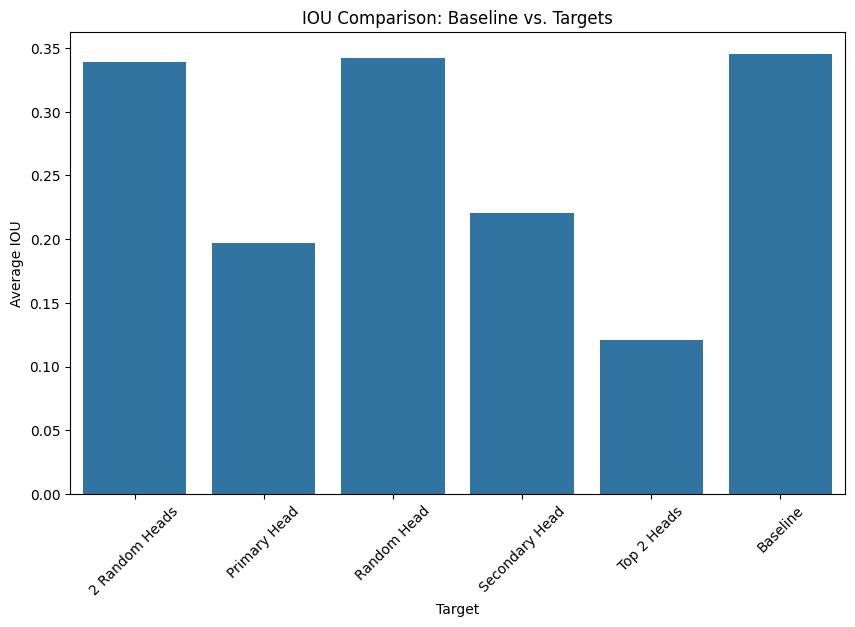

In [20]:
baseline_iou = df[df["baseline"]=="True"]["iou"].mean()
grouped_iou = df[df["baseline"]=="False"].copy()

# Swap "Secondary Head" with "Primary Head" in the 'target' column
grouped_iou['target'] = grouped_iou['target'].replace({'Secondary Head': 'Primary Head', 'Primary Head': 'Secondary Head'})

grouped_iou = grouped_iou.groupby("target")["iou"].mean().reset_index()

# Adding baseline_iou to the grouped_iou DataFrame for plotting
grouped_iou = pd.concat([grouped_iou, pd.DataFrame([{'target': 'Baseline', 'iou': baseline_iou}])], ignore_index=True)

# Adjusting figure size for better readability of labels
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_iou, x="target", y="iou")
plt.title("IOU Comparison: Baseline vs. Targets")
plt.xlabel("Target")
plt.ylabel("Average IOU")
plt.xticks(rotation=45)  # Rotating the x-axis labels for better visibility


In [9]:
df

,query_name,support_name,baseline,task,metric,iou,accuracy,layers,mse_copy
0,2007_000033,2011_001114,True,segmentation,1.623037,0.475439,0.905527,NaN,NaN
1,2007_000033,2011_001114,False,segmentation,2.872567,0.136691,0.503287,"(24, 0)",5.179157
2,2007_000033,2011_001114,False,segmentation,2.670745,0.110017,0.501015,"(24, 1)",5.817775
3,2007_000033,2011_001114,False,segmentation,2.858455,0.124656,0.484214,"(24, 2)",5.476064
4,2007_000033,2011_001114,False,segmentation,2.891526,0.139280,0.508968,"(24, 3)",4.960720
...,...,...,...,...,...,...,...,...,...
3571,2007_003621,2009_000354,False,segmentation,0.552818,0.016164,0.481292,"(29, 7)",1.505882
3572,2007_003621,2009_000354,False,segmentation,0.509405,0.016284,0.519520,"(29, 8)",1.545728
3573,2007_003621,2009_000354,False,segmentation,0.504334,0.015707,0.511728,"(29, 9)",1.513473
3574,2007_003621,2009_000354,False,segmentation,0.540666,0.015352,0.479425,"(29, 10)",1.540264


In [4]:
# Filter out the baseline data
model_df = df[df["baseline"]=="False"]

# Calculate the baseline IOU and accuracy
baseline_iou = df[df["baseline"]=="True"]["iou"].mean()
baseline_accuracy = df[df["baseline"]=="True"]["accuracy"].mean()

# Group by 'layer' and 'head', then get the average 'iou' and 'accuracy' for each group
grouped_df_iou = model_df.groupby(['layers'])['iou'].mean().reset_index()
# Splitting the 'layers' column into 'layer_index' and 'head_index'
model_df[['layer_index', 'head_index']] = pd.DataFrame(model_df['layers'].tolist(), index=model_df.index)


/tmp/ipykernel_124594/4286674497.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df[['layer_index', 'head_index']] = pd.DataFrame(model_df['layers'].tolist(), index=model_df.index)
/tmp/ipykernel_124594/4286674497.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df[['layer_index', 'head_index']] = pd.DataFrame(model_df['layers'].tolist(), index=model_df.index)


/tmp/ipykernel_2188481/1997764025.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df[['layer_index', 'head_index']] = pd.DataFrame(model_df['layers'].tolist(), index=model_df.index)
/tmp/ipykernel_2188481/1997764025.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df[['layer_index', 'head_index']] = pd.DataFrame(model_df['layers'].tolist(), index=model_df.index)
/shared/ahojel/miniconda3/envs/notebook/lib/python3.12/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice enco

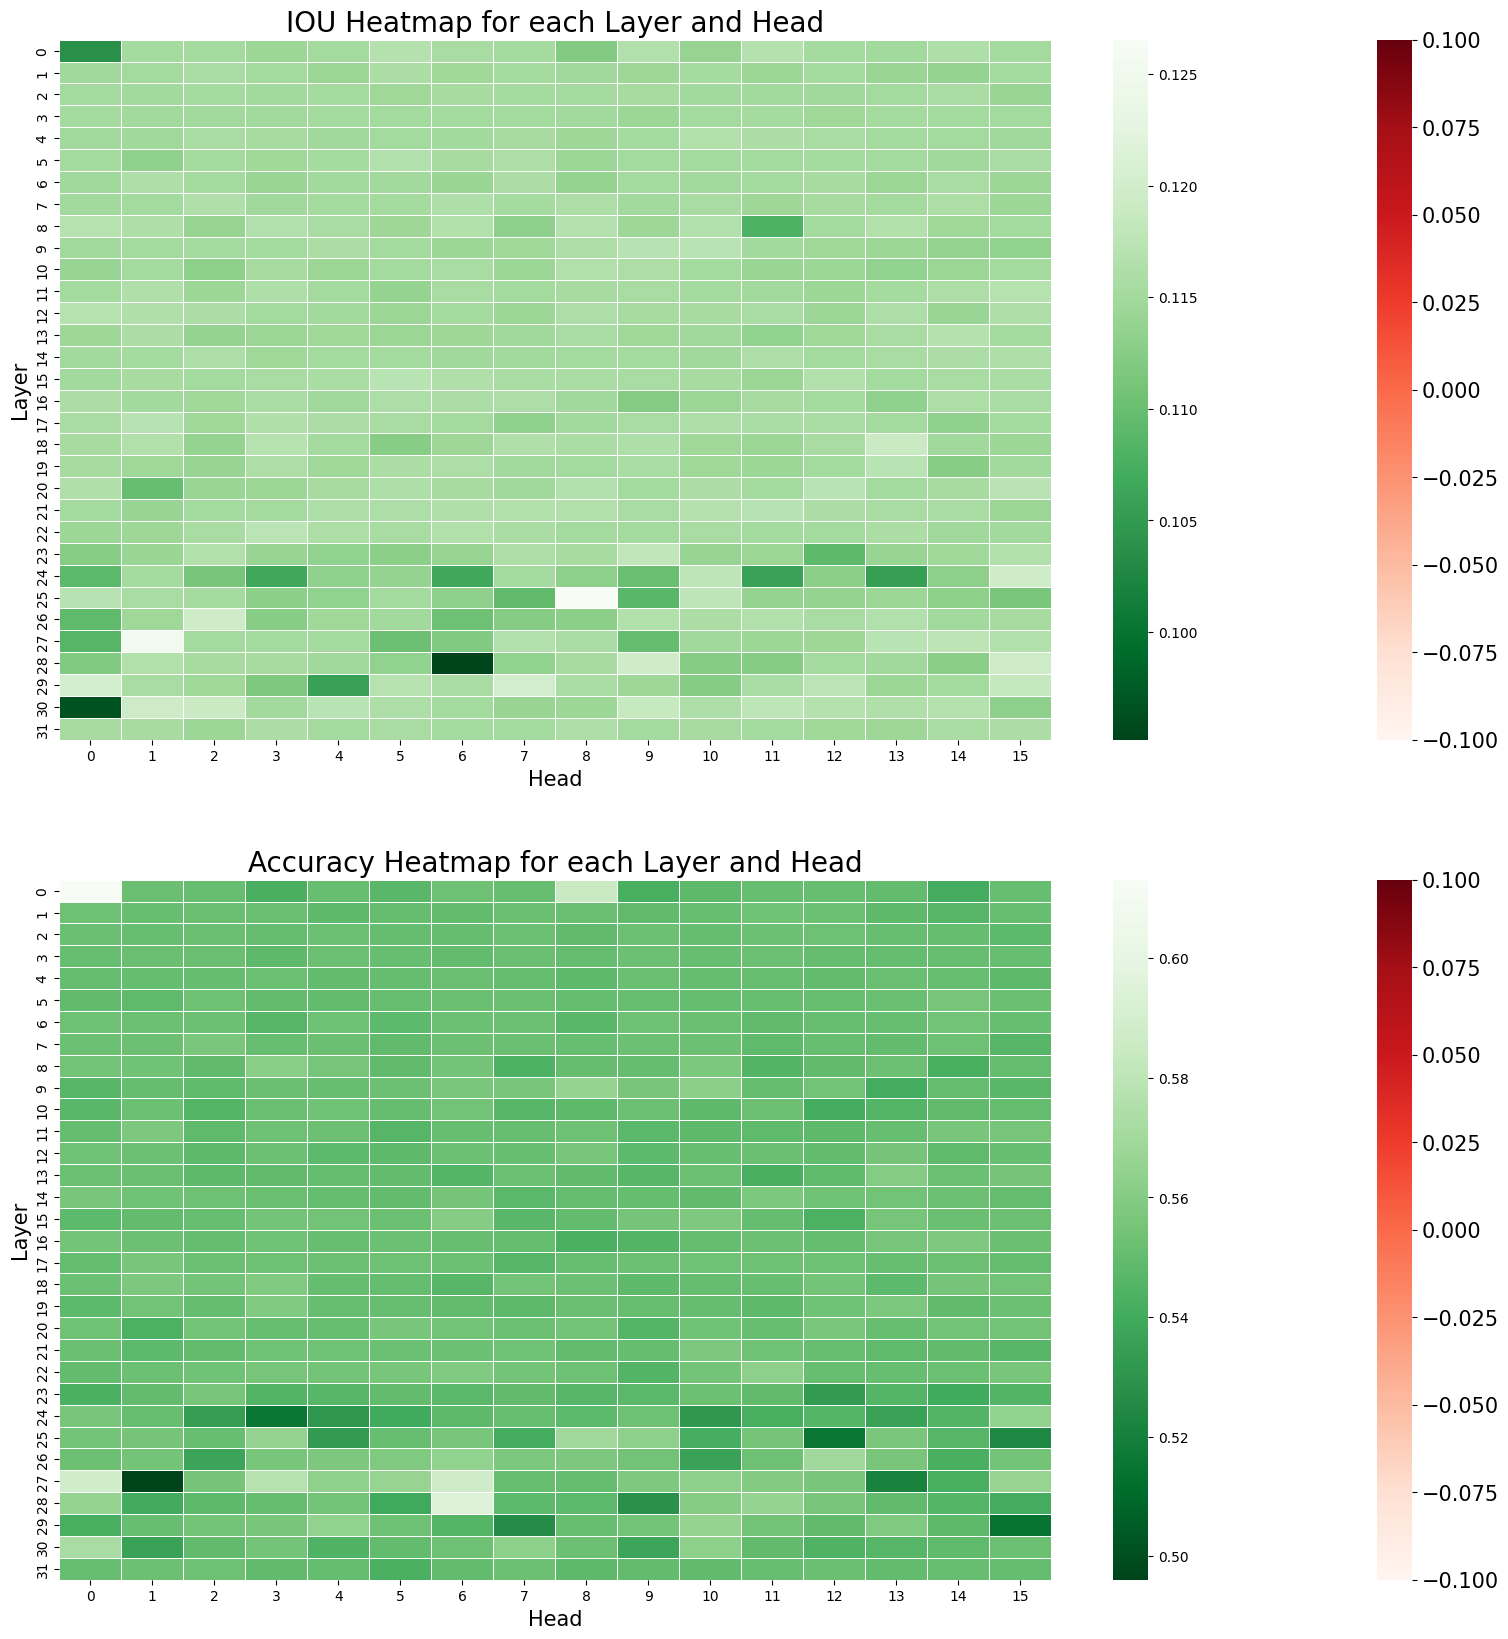

In [4]:
# Filter out the baseline data
model_df = df[df["baseline"]=="False"]

# Calculate the baseline IOU and accuracy
baseline_iou = df[df["baseline"]=="True"]["iou"].mean()
baseline_accuracy = df[df["baseline"]=="True"]["accuracy"].mean()

# Group by 'layer' and 'head', then get the average 'iou' and 'accuracy' for each group
grouped_df_iou = model_df.groupby(['layers'])['iou'].mean().reset_index()
# Splitting the 'layers' column into 'layer_index' and 'head_index'
model_df[['layer_index', 'head_index']] = pd.DataFrame(model_df['layers'].tolist(), index=model_df.index)

grouped_df_accuracy = model_df.groupby(['layer_index', 'head_index'])['accuracy'].mean().reset_index()
grouped_df_iou = model_df.groupby(['layer_index', 'head_index'])['iou'].mean().reset_index()

# Pivot the DataFrame to get 'iou' and 'accuracy' values for each 'layer_index' and 'head_index'
heatmap_data_iou = grouped_df_iou.pivot(index='layer_index', columns='head_index', values='iou').fillna(0)
heatmap_data_accuracy = grouped_df_accuracy.pivot(index='layer_index', columns='head_index', values='accuracy').fillna(0)

# Create a mask for values below the baseline
mask_iou = heatmap_data_iou < baseline_iou
mask_accuracy = heatmap_data_accuracy < baseline_accuracy

# Set the figure size to a larger value for higher resolution
fig, axs = plt.subplots(2, 1, figsize=(20, 20))

# Plot the heatmap with mask for IOU
sns.heatmap(heatmap_data_iou, cmap='Reds', mask=mask_iou, linewidths=0.5, ax=axs[0])
sns.heatmap(heatmap_data_iou, cmap='Greens_r', mask=~mask_iou, linewidths=0.5, ax=axs[0])

# Set the title and labels for the plot
axs[0].set_title('IOU Heatmap for each Layer and Head', fontsize=20)
axs[0].set_xlabel('Head', fontsize=15)
axs[0].set_ylabel('Layer', fontsize=15)

# Increase the size of the color bar for better visibility
cbar_iou = axs[0].collections[0].colorbar
cbar_iou.ax.tick_params(labelsize=15)

# Plot the heatmap with mask for accuracy
sns.heatmap(heatmap_data_accuracy, cmap='Reds', mask=mask_accuracy, linewidths=0.5, ax=axs[1])
sns.heatmap(heatmap_data_accuracy, cmap='Greens_r', mask=~mask_accuracy, linewidths=0.5, ax=axs[1])

# Set the title and labels for the plot
axs[1].set_title('Accuracy Heatmap for each Layer and Head', fontsize=20)
axs[1].set_xlabel('Head', fontsize=15)
axs[1].set_ylabel('Layer', fontsize=15)

# Increase the size of the color bar for better visibility
cbar_accuracy = axs[1].collections[0].colorbar
cbar_accuracy.ax.tick_params(labelsize=15)

,query_name,support_name,baseline,task,metric,iou,accuracy,layers,mse_copy


/tmp/ipykernel_2188481/2464649199.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df[['layer_index', 'head_index']] = pd.DataFrame(model_df['layers'].tolist(), index=model_df.index)
/tmp/ipykernel_2188481/2464649199.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df[['layer_index', 'head_index']] = pd.DataFrame(model_df['layers'].tolist(), index=model_df.index)


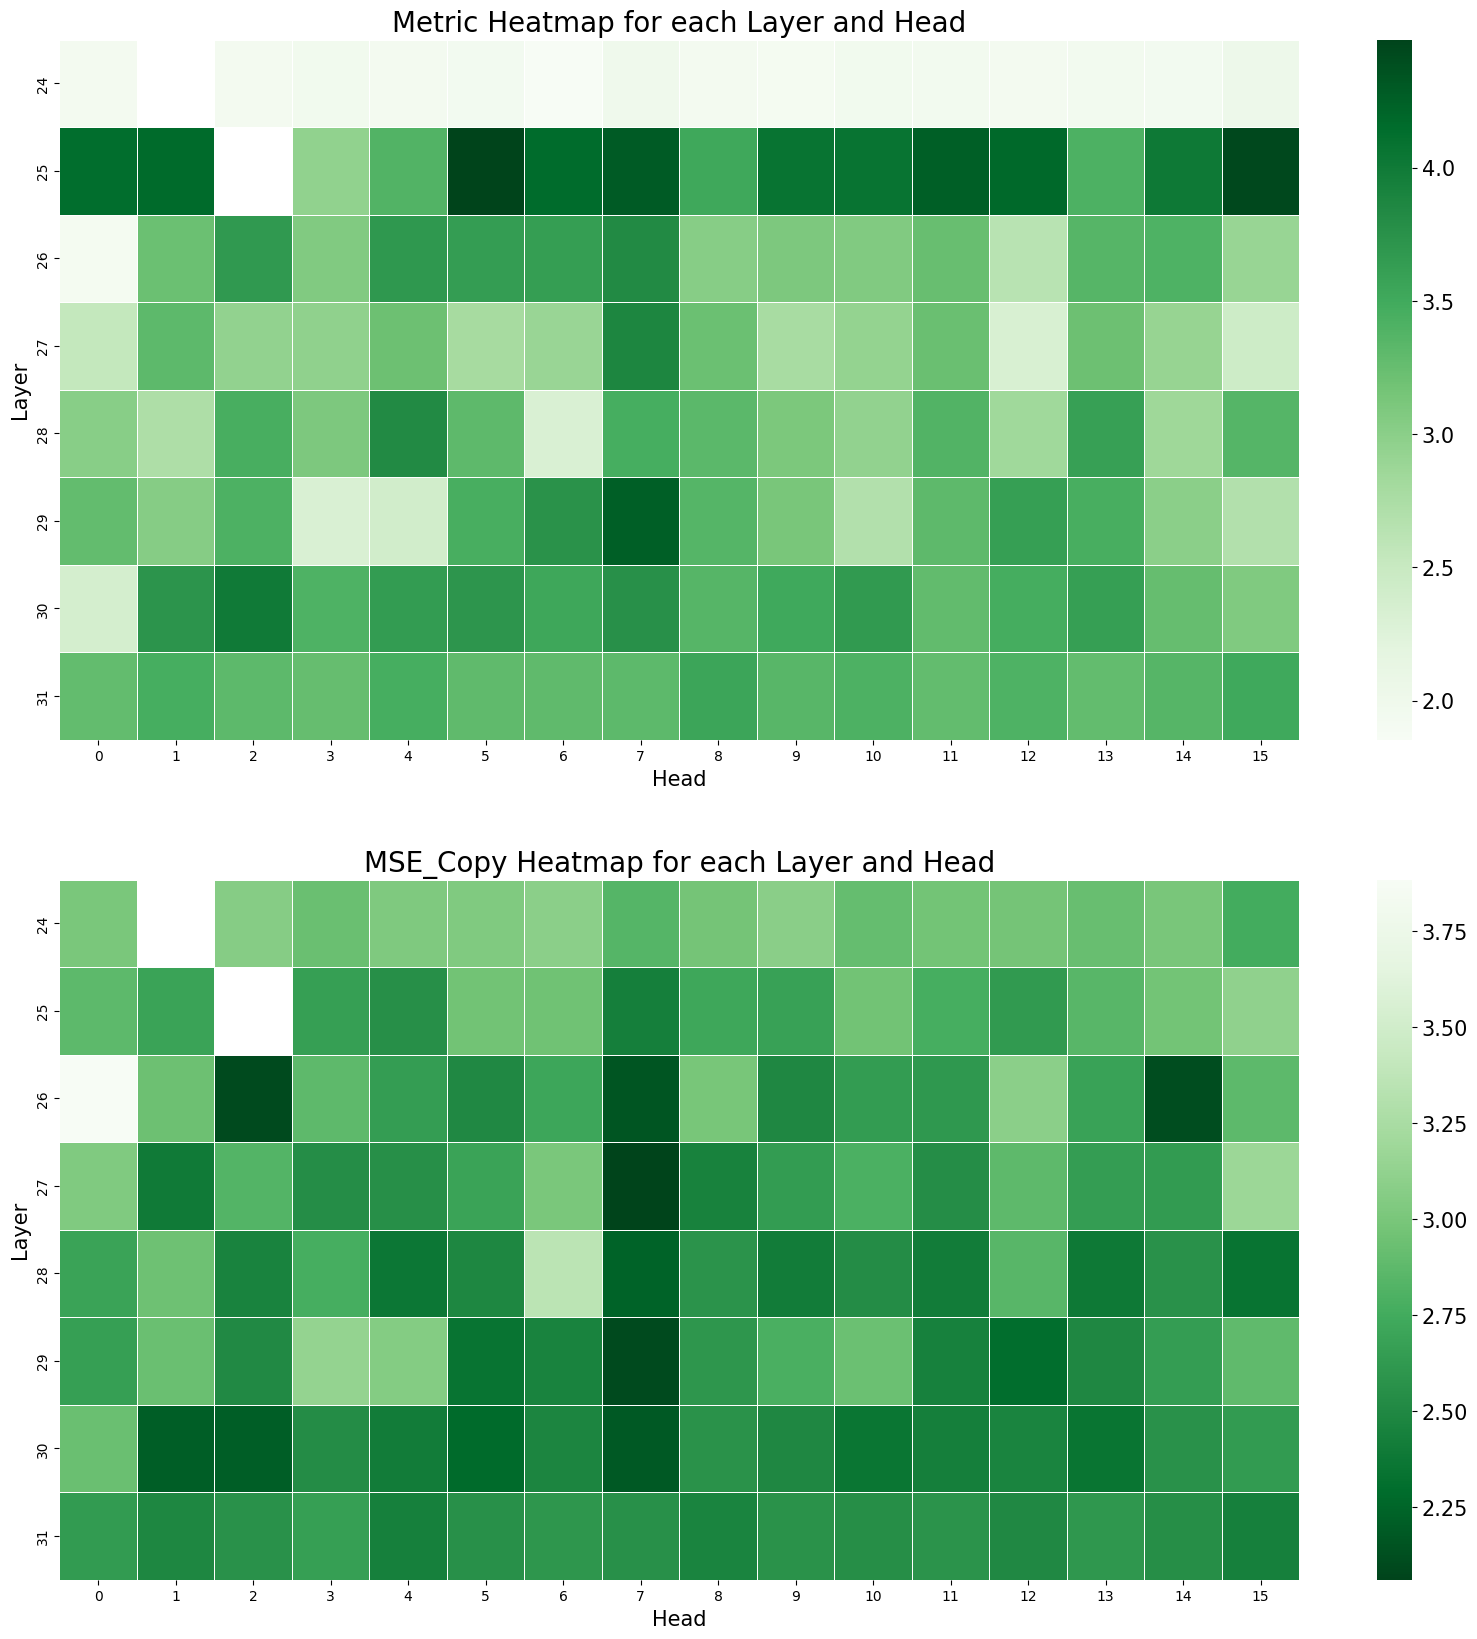

In [19]:
# Filter out the baseline data
model_df = df[df["baseline"]=="False"]

# Calculate the baseline metric and mse_copy
baseline_metric = df[df["baseline"]=="True"]["metric"].mean()
baseline_mse_copy = df[df["baseline"]=="True"]["mse_copy"].mean()

model_df[['layer_index', 'head_index']] = pd.DataFrame(model_df['layers'].tolist(), index=model_df.index)

grouped_df_mse_copy = model_df.groupby(['layer_index', 'head_index'])['mse_copy'].mean().reset_index()
grouped_df_metric = model_df.groupby(['layer_index', 'head_index'])['metric'].mean().reset_index()

# Pivot the DataFrame to get 'metric' and 'mse_copy' values for each 'layer_index' and 'head_index' without filling NaN values
heatmap_data_metric = grouped_df_metric.pivot(index='layer_index', columns='head_index', values='metric')
heatmap_data_mse_copy = grouped_df_mse_copy.pivot(index='layer_index', columns='head_index', values='mse_copy')

# Set the figure size to a larger value for higher resolution
fig, axs = plt.subplots(2, 1, figsize=(20, 20))

# Plot the heatmap with mask for metric
sns.heatmap(heatmap_data_metric, cmap='Greens', linewidths=0.5, ax=axs[0])

# Set the title and labels for the plot
axs[0].set_title('Metric Heatmap for each Layer and Head', fontsize=20)
axs[0].set_xlabel('Head', fontsize=15)
axs[0].set_ylabel('Layer', fontsize=15)

# Increase the size of the color bar for better visibility
cbar_metric = axs[0].collections[0].colorbar
cbar_metric.ax.tick_params(labelsize=15)

# Plot the heatmap with mask for mse_copy
sns.heatmap(heatmap_data_mse_copy, cmap='Greens_r', linewidths=0.5, ax=axs[1])

# Set the title and labels for the plot
axs[1].set_title('MSE_Copy Heatmap for each Layer and Head', fontsize=20)
axs[1].set_xlabel('Head', fontsize=15)
axs[1].set_ylabel('Layer', fontsize=15)

# Increase the size of the color bar for better visibility
cbar_mse_copy = axs[1].collections[0].colorbar
cbar_mse_copy.ax.tick_params(labelsize=15)


In [16]:
model_df[model_df['mse_copy']<0.5]["layers"].value_counts()

layers
(25, 15)    60
(24, 13)    53
(8, 11)     48
(23, 12)    47
(24, 2)     47
            ..
(25, 10)     6
(25, 8)      6
(25, 1)      5
(24, 10)     4
(0, 8)       4
Name: count, Length: 511, dtype: int64

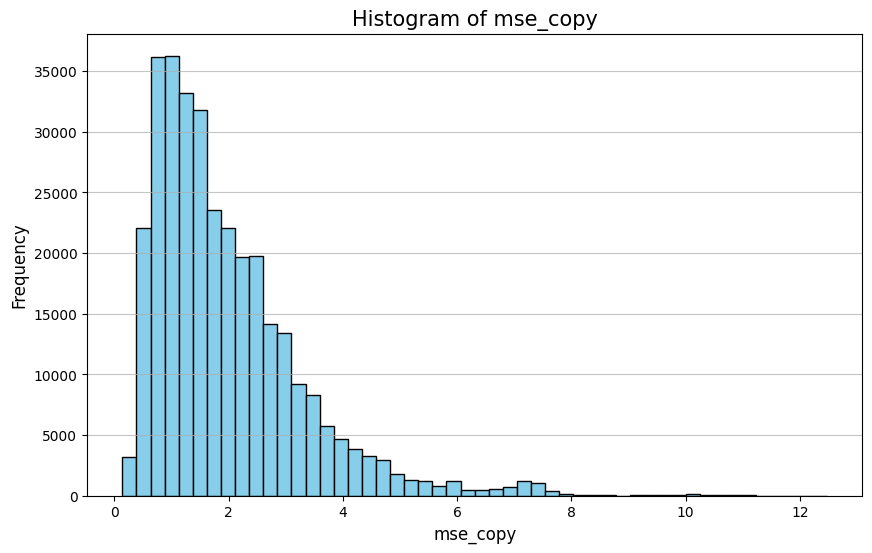

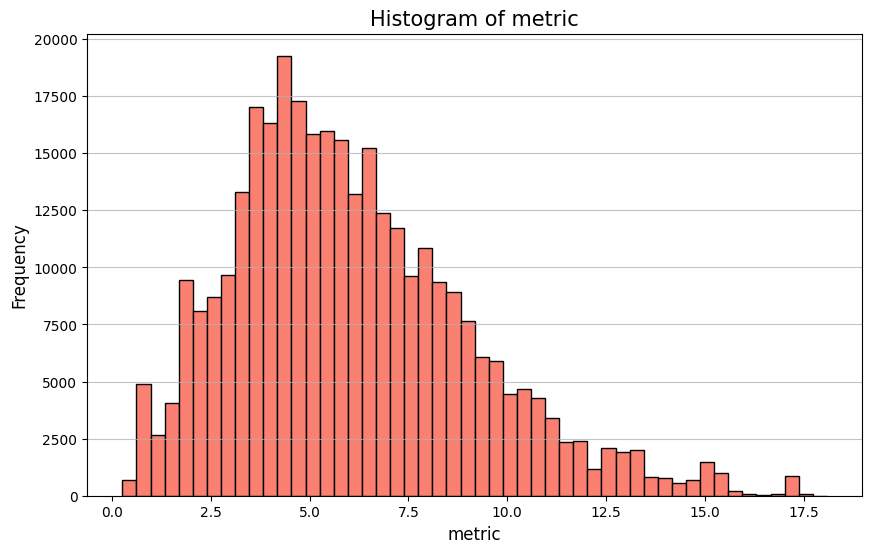

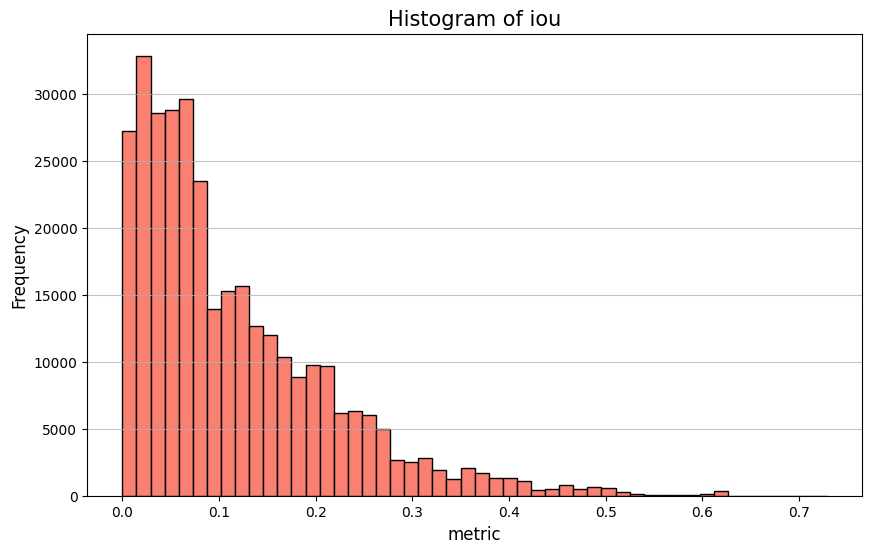

In [18]:



# Plot a histogram of mse_copy
plt.figure(figsize=(10, 6))
plt.hist(model_df['mse_copy'].dropna(), bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of mse_copy', fontsize=15)
plt.xlabel('mse_copy', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.75)

# Plot a histogram of metric
plt.figure(figsize=(10, 6))
plt.hist(model_df['metric'].dropna(), bins=50, color='salmon', edgecolor='black')
plt.title('Histogram of metric', fontsize=15)
plt.xlabel('metric', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.75)

plt.figure(figsize=(10, 6))
plt.hist(model_df['iou'].dropna(), bins=50, color='salmon', edgecolor='black')
plt.title('Histogram of iou', fontsize=15)
plt.xlabel('metric', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.75)


In [86]:
with open('/home/ahojel/visual_prompting_vid/output_dir/abalate_heads_2/log.txt', 'r') as file:
#with open('/home/ahojel/visual_prompting_vid/output_dir/doublelayer_1/log.txt', 'r') as file:
    data = file.readlines()


# Convert each line from string to dictionary
data2 = []
for line in data:
    try:
        data2.append(eval(line.strip()))
    except:
        continue


In [87]:
# Create a DataFrame
df = pd.DataFrame(data2)

In [88]:
df

,query_name,support_name,baseline,task,metric,iou,accuracy,layer,head
0,2007_000033,2011_001114,True,segmentation,1.623007,0.476555,0.905771,NaN,NaN
1,2007_000033,2011_001114,False,segmentation,1.583483,0.484808,0.906420,0.0,0.0
2,2007_000033,2011_001114,False,segmentation,1.623007,0.476555,0.905771,0.0,1.0
3,2007_000033,2011_001114,False,segmentation,1.623007,0.476555,0.905771,0.0,2.0
4,2007_000033,2011_001114,False,segmentation,1.607184,0.489741,0.907150,0.0,3.0
...,...,...,...,...,...,...,...,...,...
1254336,2010_003418,2010_004556,False,colorization,0.236624,NaN,NaN,3.0,2.0
1254337,2010_003418,2010_004556,False,colorization,0.236280,NaN,NaN,3.0,3.0
1254338,2010_003418,2010_004556,False,colorization,0.235495,NaN,NaN,3.0,4.0
1254339,2010_003418,2010_004556,False,colorization,0.238113,NaN,NaN,3.0,5.0


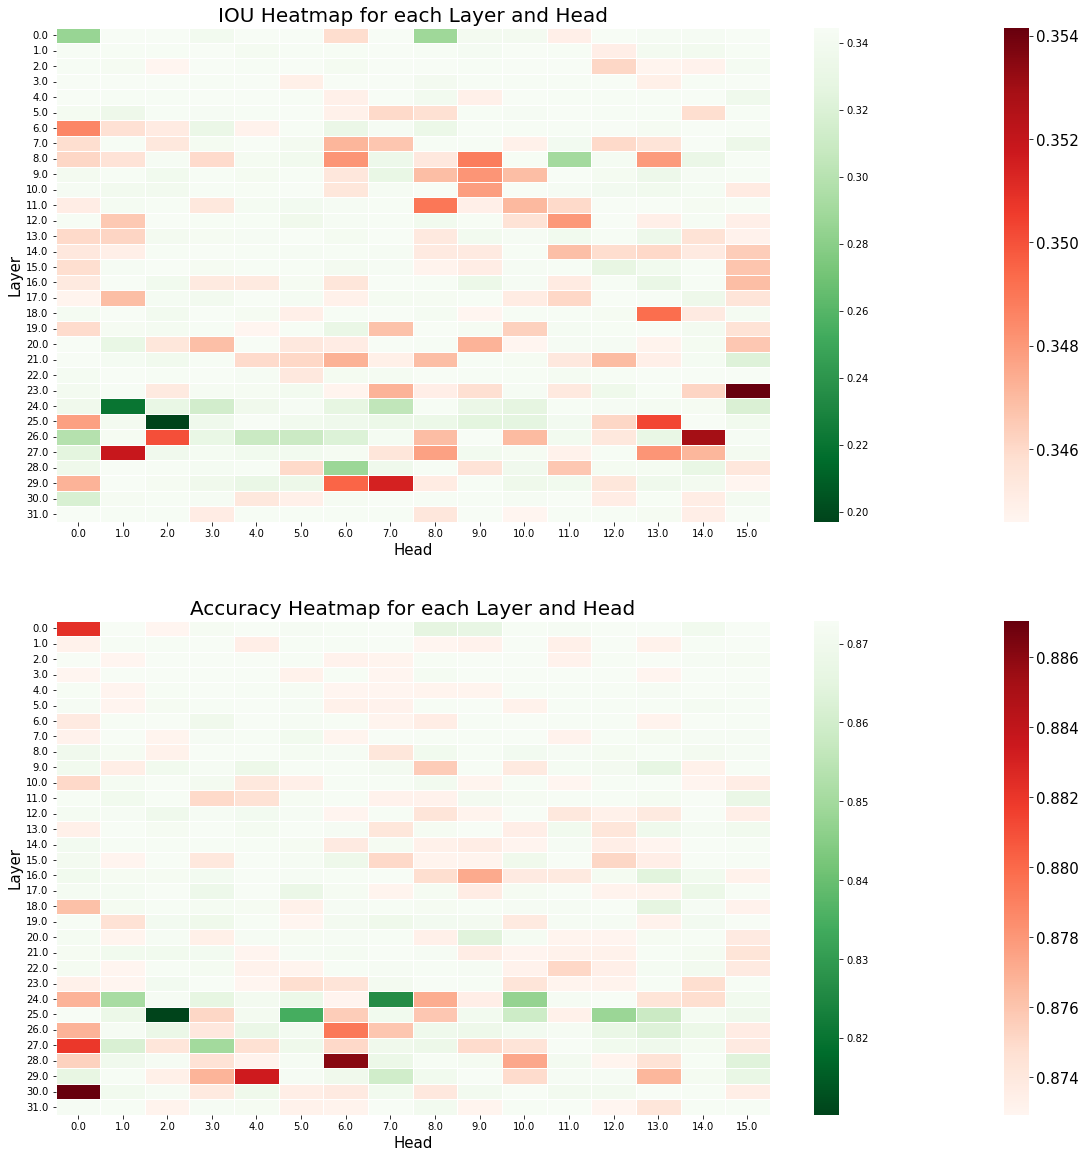

In [89]:
# Filter out the baseline data
model_df = df[df["baseline"]=="False"]

# Calculate the baseline IOU and accuracy
baseline_iou = df[df["baseline"]=="True"]["iou"].mean()
baseline_accuracy = df[df["baseline"]=="True"]["accuracy"].mean()

# Group by 'layer' and 'head', then get the average 'iou' and 'accuracy' for each group
grouped_df_iou = model_df.groupby(['layer','head'])['iou'].mean().reset_index()
grouped_df_accuracy = model_df.groupby(['layer','head'])['accuracy'].mean().reset_index()

# Pivot the DataFrame to get 'iou' and 'accuracy' values for each 'layer' and 'head'
heatmap_data_iou = grouped_df_iou.pivot(index='layer', columns='head', values='iou')
heatmap_data_accuracy = grouped_df_accuracy.pivot(index='layer', columns='head', values='accuracy')

# Create a mask for values below the baseline
mask_iou = heatmap_data_iou < baseline_iou
mask_accuracy = heatmap_data_accuracy < baseline_accuracy

# Set the figure size to a larger value for higher resolution
fig, axs = plt.subplots(2, 1, figsize=(20, 20))

# Plot the heatmap with mask for IOU
sns.heatmap(heatmap_data_iou, cmap='Reds', mask=mask_iou, linewidths=0.5, ax=axs[0])
sns.heatmap(heatmap_data_iou, cmap='Greens_r', mask=~mask_iou, linewidths=0.5, ax=axs[0])

# Set the title and labels for the plot
axs[0].set_title('IOU Heatmap for each Layer and Head', fontsize=20)
axs[0].set_xlabel('Head', fontsize=15)
axs[0].set_ylabel('Layer', fontsize=15)

# Increase the size of the color bar for better visibility
cbar_iou = axs[0].collections[0].colorbar
cbar_iou.ax.tick_params(labelsize=15)

# Plot the heatmap with mask for accuracy
sns.heatmap(heatmap_data_accuracy, cmap='Reds', mask=mask_accuracy, linewidths=0.5, ax=axs[1])
sns.heatmap(heatmap_data_accuracy, cmap='Greens_r', mask=~mask_accuracy, linewidths=0.5, ax=axs[1])

# Set the title and labels for the plot
axs[1].set_title('Accuracy Heatmap for each Layer and Head', fontsize=20)
axs[1].set_xlabel('Head', fontsize=15)
axs[1].set_ylabel('Layer', fontsize=15)

# Increase the size of the color bar for better visibility
cbar_accuracy = axs[1].collections[0].colorbar
cbar_accuracy.ax.tick_params(labelsize=15)



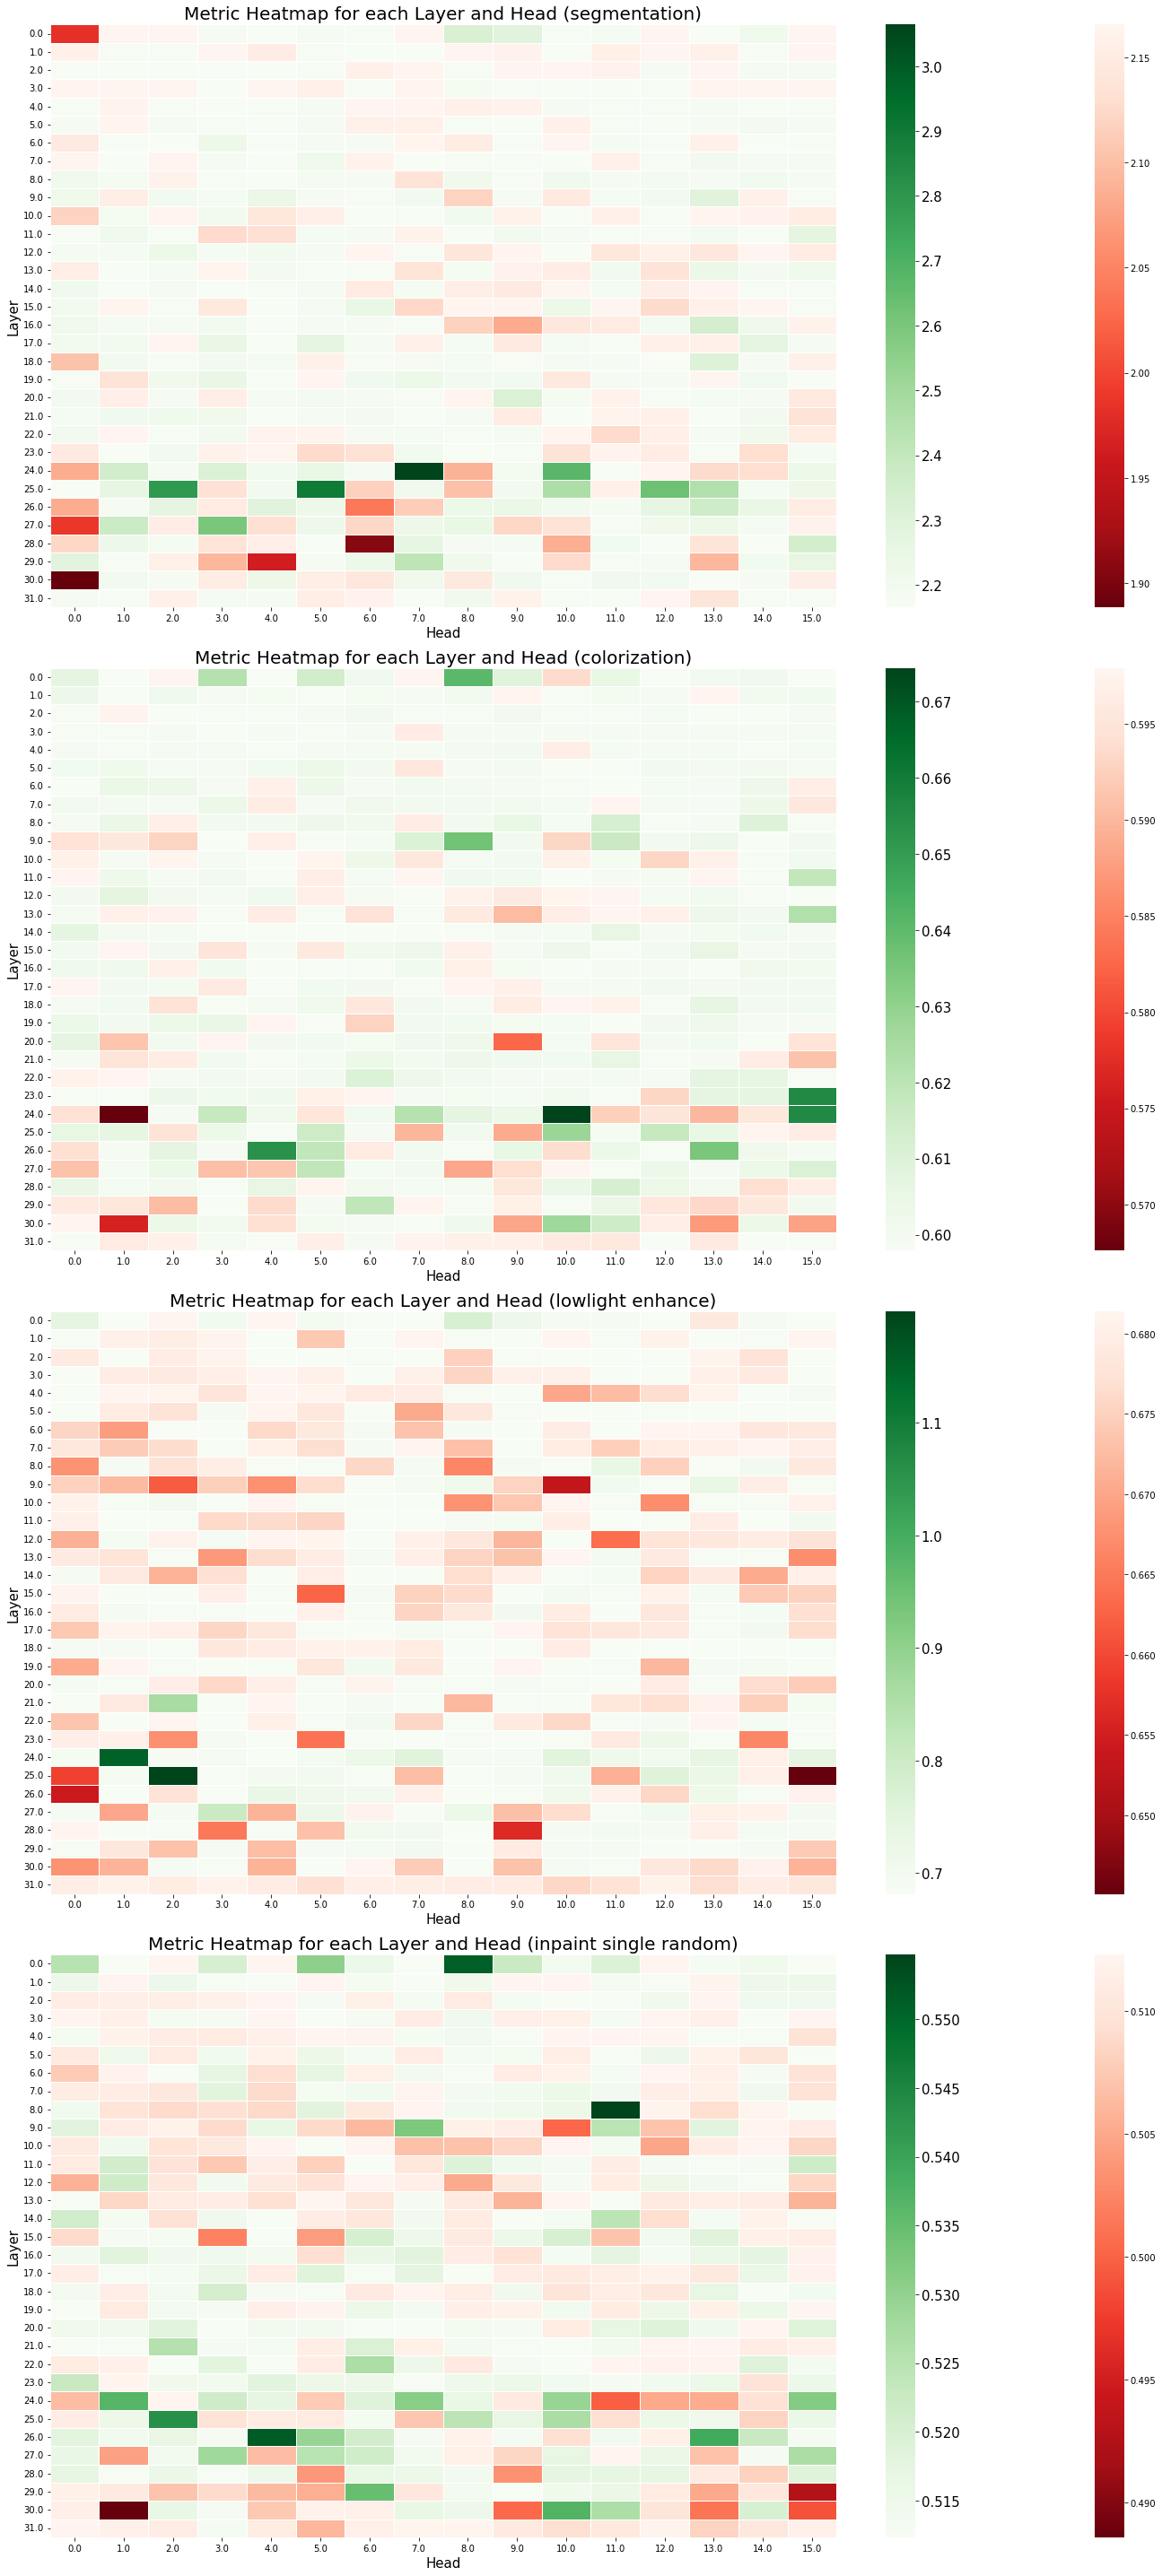

In [90]:
tasks = ['segmentation', 'colorization', 'lowlight enhance', 'inpaint single random']

fig, axs = plt.subplots(len(tasks), 1, figsize=(20, 10*len(tasks)))

for i, task in enumerate(tasks):
    # Filter the dataframe for the task
    task_df = df[df["task"] == task]

    # Calculate the baseline metric
    baseline = task_df[task_df["baseline"]=="True"]["metric"].mean()

    # Filter out the baseline data
    model_df = task_df[task_df["baseline"]=="False"]

    # Group by 'layer' and 'head', then get the average 'metric' for each group
    grouped_df = model_df.groupby(['layer','head'])['metric'].mean().reset_index()

    # Pivot the DataFrame to get 'metric' values for each 'layer' and 'head'
    heatmap_data = grouped_df.pivot(index='layer', columns='head', values='metric')

    # Create a mask for values below the baseline
    mask = heatmap_data > baseline

    # Plot the heatmap with mask
    sns.heatmap(heatmap_data, cmap='Reds_r', mask=mask, linewidths=0.5, ax=axs[i])
    sns.heatmap(heatmap_data, cmap='Greens', mask=~mask, linewidths=0.5, ax=axs[i])

    # Set the title and labels for the plot
    axs[i].set_title(f'Metric Heatmap for each Layer and Head ({task})', fontsize=20)
    axs[i].set_xlabel('Head', fontsize=15)
    axs[i].set_ylabel('Layer', fontsize=15)

    # Increase the size of the color bar for better visibility
    cbar = plt.gcf().axes[-1]
    cbar.tick_params(labelsize=15)

plt.tight_layout()
plt.show()


In [ ]:
tasks = ['segmentation', 'colorization', 'lowlight enhance', 'inpaint single random']

fig, axs = plt.subplots(len(tasks), 1, figsize=(20, 10*len(tasks)))

for i, task in enumerate(tasks):
    # Filter the dataframe for the task
    task_df = df[df["task"] == task]

    # Calculate the baseline metric
    baseline = task_df[task_df["baseline"]=="True"]["metric"].mean()

    # Filter out the baseline data
    model_df = task_df[task_df["baseline"]=="False"]

    # Group by 'layer' and 'head', then get the average 'metric' for each group
    grouped_df = model_df.groupby(['layer','head'])['metric'].mean().reset_index()

    # Pivot the DataFrame to get 'metric' values for each 'layer' and 'head'
    heatmap_data = grouped_df.pivot(index='layer', columns='head', values='metric')

    # Create a mask for values below the baseline
    mask = heatmap_data > baseline

    # Plot the heatmap with mask
    sns.heatmap(heatmap_data, cmap='Reds_r', mask=mask, linewidths=0.5, ax=axs[i])
    sns.heatmap(heatmap_data, cmap='Greens', mask=~mask, linewidths=0.5, ax=axs[i])

    # Set the title and labels for the plot
    axs[i].set_title(f'Metric Heatmap for each Layer and Head ({task})', fontsize=20)
    axs[i].set_xlabel('Head', fontsize=15)
    axs[i].set_ylabel('Layer', fontsize=15)

    # Increase the size of the color bar for better visibility
    cbar = plt.gcf().axes[-1]
    cbar.tick_params(labelsize=15)

plt.tight_layout()
plt.show()


In [100]:
grouped_df

In [103]:
task_df = df[df["task"] == "segmentation"]
model_df = task_df[task_df["baseline"]=="False"]

# Create a new DataFrame with columns 'layer', 'head', 'omitted_iou', and 'omitted_accuracy'
# Initialize an empty list to store the data
data = []

# Group the DataFrame by 'layer' and 'head'
grouped_df = model_df.groupby(['layer','head'])

# Iterate over each group
for (layer, head), group in grouped_df:
    # Calculate the mean 'iou' and 'accuracy' for the current group
    mean_iou = model_df[(model_df["layer"]!=layer)&(model_df["head"]!=head)]['iou'].mean()
    
    # Append the data to the list
    data.append({'layer': layer, 'head': head, 'omitted_iou': mean_iou})

# Convert the list to a DataFrame
new_df = pd.DataFrame(data)

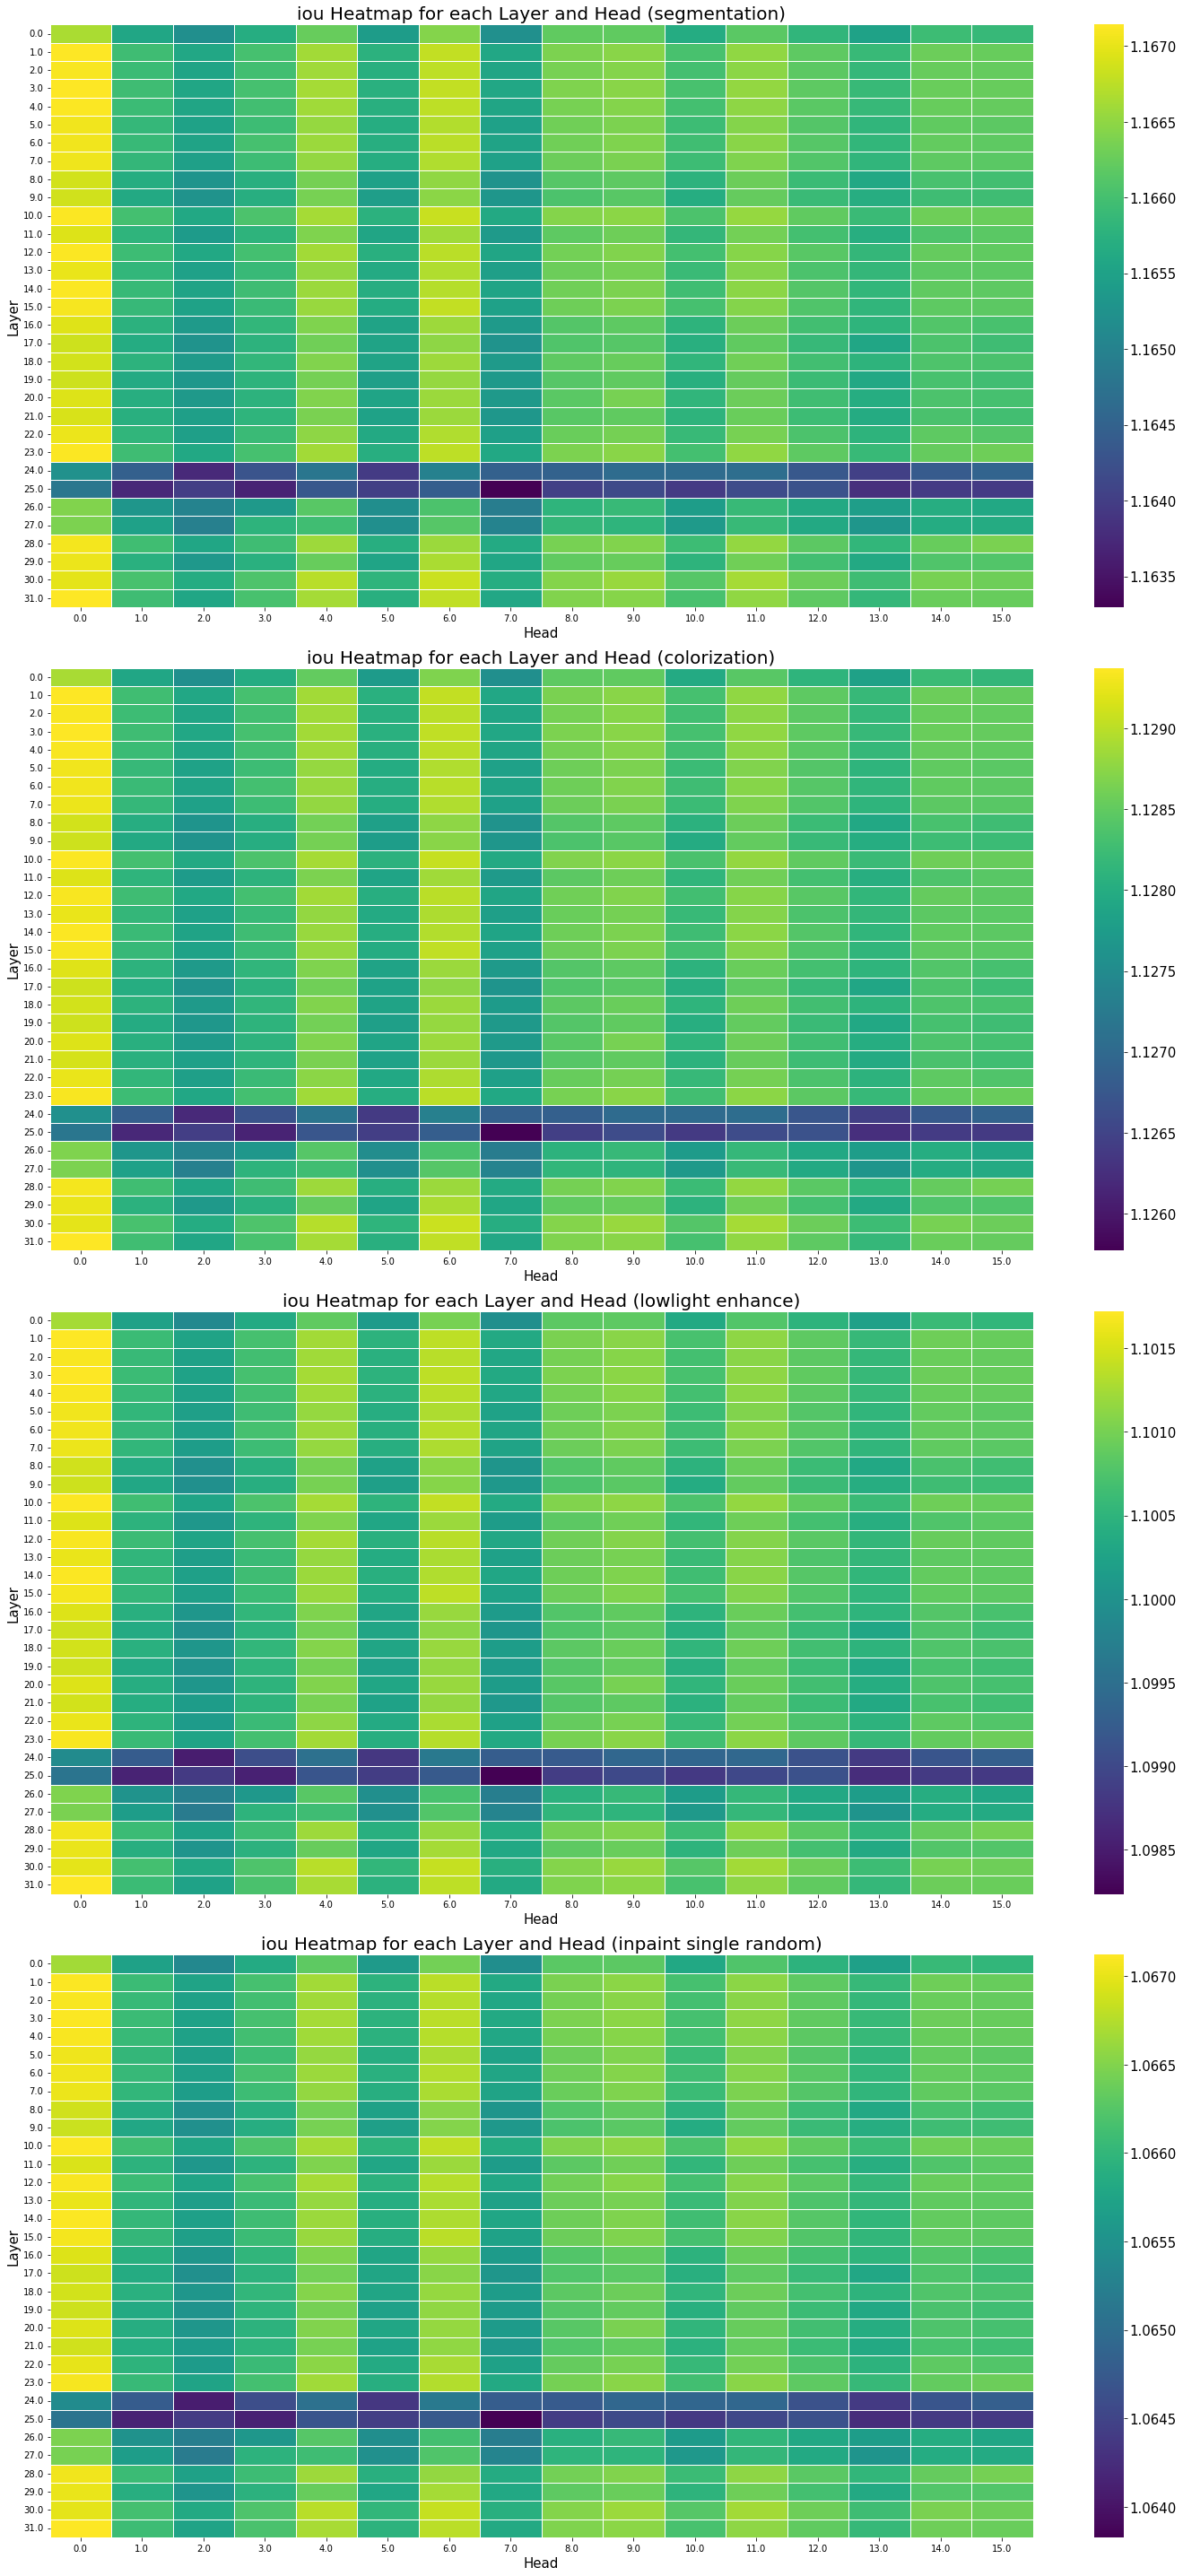

In [120]:
tasks = ['segmentation',"colorization","lowlight enhance","inpaint single random"]

fig, axs = plt.subplots(len(tasks), 1, figsize=(20, 10*len(tasks)))

for i, task in enumerate(tasks):
    # Filter the dataframe for the task
    task_df = df[df["task"] == task]

    # Calculate the baseline metric
    baseline = task_df[task_df["baseline"]=="True"]["metric"].mean()

    # Filter out the baseline data
    model_df = task_df[task_df["baseline"]=="False"]

    # Group by 'layer' and 'head', then get the average 'metric' for each group
    grouped_df = model_df.groupby(['layer','head'])

    for (layer, head), group in grouped_df:
        # Calculate the mean 'iou' and 'accuracy' for the current group
        metric = model_df[(model_df["layer"]!=layer)&(model_df["head"]!=head)]['metric'].mean()
        
        # Append the data to the list
        data.append({'layer': layer, 'head': head, 'metric': metric})

    # Convert the list to a DataFrame
    new_df = pd.DataFrame(data)

    new_df = new_df.groupby(['layer','head'])['metric'].mean().reset_index()


    # Pivot the DataFrame to get 'metric' values for each 'layer' and 'head'
    heatmap_data = new_df.pivot(index='layer', columns='head', values='metric')

    # Create a mask for values below the baseline
    #mask = heatmap_data > baseline

    # Plot the heatmap with mask
    #sns.heatmap(heatmap_data, cmap='Reds_r', mask=mask, linewidths=0.5, ax=axs[i])
    sns.heatmap(heatmap_data, cmap='viridis', linewidths=0.5, ax=axs[i])

    # Set the title and labels for the plot
    axs[i].set_title(f'iou Heatmap for each Layer and Head ({task})', fontsize=20)
    axs[i].set_xlabel('Head', fontsize=15)
    axs[i].set_ylabel('Layer', fontsize=15)

    # Increase the size of the color bar for better visibility
    cbar = plt.gcf().axes[-1]
    cbar.tick_params(labelsize=15)

plt.tight_layout()
plt.show()


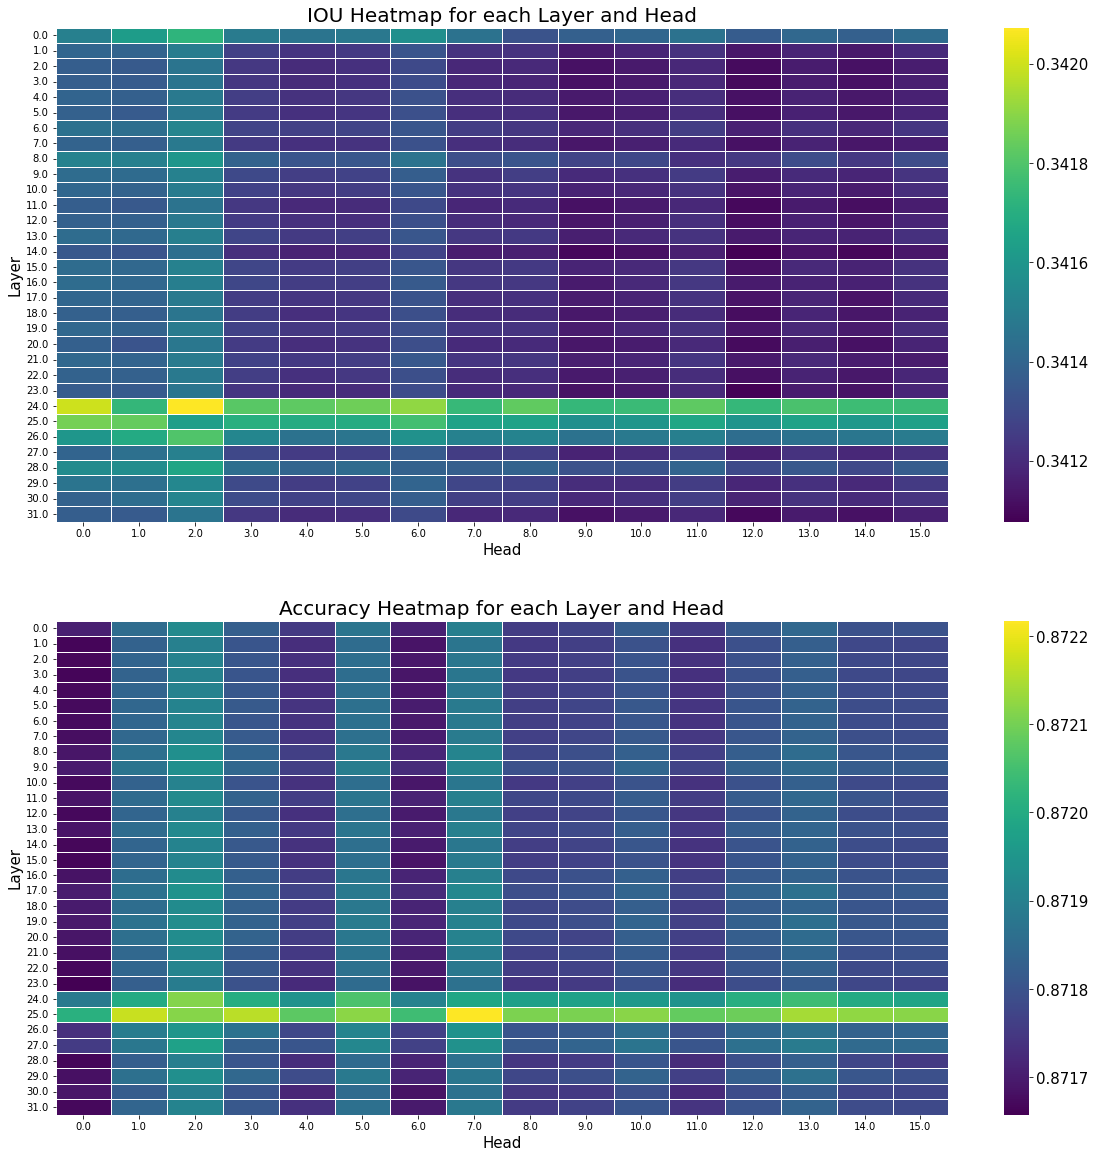

In [119]:
# Filter out the baseline data
model_df = df[df["baseline"]=="False"]

# Calculate the baseline IOU and accuracy
baseline_iou = df[df["baseline"]=="True"]["iou"].mean()
baseline_accuracy = df[df["baseline"]=="True"]["accuracy"].mean()


grouped_df = model_df.groupby(['layer','head'])

for (layer, head), group in grouped_df:
    # Calculate the mean 'iou' and 'accuracy' for the current group
    acc = model_df[(model_df["layer"]!=layer)&(model_df["head"]!=head)]['accuracy'].mean()
    iou = model_df[(model_df["layer"]!=layer)&(model_df["head"]!=head)]['iou'].mean()
    
    # Append the data to the list
    data.append({'layer': layer, 'head': head, 'iou': iou, "accuracy":acc})

# Convert the list to a DataFrame
new_df = pd.DataFrame(data)

model_df = new_df

# Group by 'layer' and 'head', then get the average 'iou' and 'accuracy' for each group
grouped_df_iou = model_df.groupby(['layer','head'])['iou'].mean().reset_index()
grouped_df_accuracy = model_df.groupby(['layer','head'])['accuracy'].mean().reset_index()

# Pivot the DataFrame to get 'iou' and 'accuracy' values for each 'layer' and 'head'
heatmap_data_iou = grouped_df_iou.pivot(index='layer', columns='head', values='iou')
heatmap_data_accuracy = grouped_df_accuracy.pivot(index='layer', columns='head', values='accuracy')
# Set the figure size to a larger value for higher resolution
fig, axs = plt.subplots(2, 1, figsize=(20, 20))

sns.heatmap(heatmap_data_iou, cmap='viridis', linewidths=0.5, ax=axs[0])

# Set the title and labels for the plot
axs[0].set_title('IOU Heatmap for each Layer and Head', fontsize=20)
axs[0].set_xlabel('Head', fontsize=15)
axs[0].set_ylabel('Layer', fontsize=15)

# Increase the size of the color bar for better visibility
cbar_iou = axs[0].collections[0].colorbar
cbar_iou.ax.tick_params(labelsize=15)
sns.heatmap(heatmap_data_accuracy, cmap='viridis', linewidths=0.5, ax=axs[1])

# Set the title and labels for the plot
axs[1].set_title('Accuracy Heatmap for each Layer and Head', fontsize=20)
axs[1].set_xlabel('Head', fontsize=15)
axs[1].set_ylabel('Layer', fontsize=15)

# Increase the size of the color bar for better visibility
cbar_accuracy = axs[1].collections[0].colorbar
cbar_accuracy.ax.tick_params(labelsize=15)


